## Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [4]:
data = pd.read_csv(r'parkinsons_train.csv', header=0)

In [5]:
data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,status
0,156.405,189.398,142.822,0.00768,0.00005,0.00372,0.00399,0.01116,0.03995,0.348,0.01721,0.02374,0.04310,0.05164,1
1,153.848,165.738,65.782,0.00840,0.00005,0.00428,0.00450,0.01285,0.03810,0.328,0.01667,0.02383,0.04055,0.05000,1
2,153.880,172.860,78.128,0.00480,0.00003,0.00232,0.00267,0.00696,0.04137,0.370,0.02021,0.02591,0.04525,0.06062,1
3,167.930,193.221,79.068,0.00442,0.00003,0.00220,0.00247,0.00661,0.04351,0.377,0.02228,0.02540,0.04246,0.06685,1
4,173.917,192.735,86.180,0.00476,0.00003,0.00221,0.00258,0.00663,0.04192,0.364,0.02187,0.02470,0.03772,0.06562,1


In [6]:
data.shape

(96, 15)

In [7]:
data.index

RangeIndex(start=0, stop=96, step=1)

In [8]:
data.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'status'],
      dtype='object')

### Checking for null values (missing values)

In [9]:
data.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
status              0
dtype: int64

### Selecting independent and dependent variables

In [18]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [19]:
X

array([[1.56405e+02, 1.89398e+02, 1.42822e+02, ..., 2.37400e-02,
        4.31000e-02, 5.16400e-02],
       [1.53848e+02, 1.65738e+02, 6.57820e+01, ..., 2.38300e-02,
        4.05500e-02, 5.00000e-02],
       [1.53880e+02, 1.72860e+02, 7.81280e+01, ..., 2.59100e-02,
        4.52500e-02, 6.06200e-02],
       ...,
       [1.74688e+02, 2.40005e+02, 7.42870e+01, ..., 1.36500e-02,
        1.66700e-02, 3.80400e-02],
       [1.98764e+02, 3.96961e+02, 7.49040e+01, ..., 1.32100e-02,
        1.58800e-02, 3.79400e-02],
       [2.14289e+02, 2.60277e+02, 7.79730e+01, ..., 1.16100e-02,
        1.37300e-02, 3.07800e-02]])

In [20]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### Spliting the dataset for training and testing

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 12)

In [22]:
X_train

array([[2.01464e+02, 2.10565e+02, 1.95708e+02, ..., 7.60000e-03,
        9.57000e-03, 1.75800e-02],
       [1.54003e+02, 1.60267e+02, 1.28621e+02, ..., 5.82000e-03,
        8.71000e-03, 1.40600e-02],
       [1.16556e+02, 5.92030e+02, 8.62280e+01, ..., 9.72000e-03,
        1.49100e-02, 2.46000e-02],
       ...,
       [1.04400e+02, 2.06002e+02, 7.79680e+01, ..., 2.24500e-02,
        3.78000e-02, 5.19700e-02],
       [2.45510e+02, 2.62090e+02, 2.31848e+02, ..., 9.77000e-03,
        1.14900e-02, 2.71900e-02],
       [1.17004e+02, 1.44466e+02, 9.99230e+01, ..., 1.06200e-02,
        1.31800e-02, 2.64300e-02]])

In [23]:
X_test

array([[1.17274e+02, 1.29916e+02, 1.10402e+02, 7.52000e-03, 6.00000e-05,
        2.99000e-03, 4.69000e-03, 8.98000e-03, 2.29300e-02, 2.21000e-01,
        1.18900e-02, 1.45900e-02, 1.94800e-02, 3.56800e-02],
       [1.46845e+02, 2.08701e+02, 8.17370e+01, 4.96000e-03, 3.00000e-05,
        2.50000e-03, 2.75000e-03, 7.49000e-03, 1.91900e-02, 1.98000e-01,
        8.83000e-03, 1.14400e-02, 1.82600e-02, 2.65000e-02],
       [2.02266e+02, 2.11604e+02, 1.97079e+02, 1.80000e-03, 9.00000e-06,
        9.30000e-04, 1.07000e-03, 2.78000e-03, 9.54000e-03, 8.50000e-02,
        4.69000e-03, 6.06000e-03, 7.19000e-03, 1.40700e-02],
       [1.71041e+02, 2.08313e+02, 7.55010e+01, 4.55000e-03, 3.00000e-05,
        2.50000e-03, 2.34000e-03, 7.50000e-03, 1.96600e-02, 1.86000e-01,
        8.89000e-03, 1.16900e-02, 1.87200e-02, 2.66600e-02],
       [1.77876e+02, 1.92921e+02, 1.68013e+02, 4.11000e-03, 2.00000e-05,
        2.33000e-03, 2.41000e-03, 7.00000e-03, 2.12600e-02, 1.89000e-01,
        1.15400e-02, 1.347

In [24]:
y_train

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0],
      dtype=int64)

In [25]:
y_test

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

### Limiting the range of variables -> to compare them commonly

In [26]:
from sklearn.preprocessing import StandardScaler
standard_X = StandardScaler()
standard_X.fit(X_train)
standard_X_rfe = StandardScaler()

In [27]:
X_train = standard_X.transform(X_train)
X_test = standard_X.transform(X_test)

In [28]:
X_train

array([[ 0.84377373,  0.04225676,  1.30625656, ..., -0.80522644,
        -0.83284438, -0.83056427],
       [-0.21493983, -0.47082098,  0.01284582, ..., -1.05154274,
        -0.9137804 , -0.98051054],
       [-1.05027087,  3.93348903, -0.8044744 , ..., -0.51186097,
        -0.33028814, -0.53152369],
       ...,
       [-1.32143503, -0.0042893 , -0.96372392, ...,  1.24971569,
         1.82392766,  0.6343938 ],
       [ 1.82630882,  0.56785083,  2.00302142, ..., -0.50494197,
        -0.65215   , -0.4211939 ],
       [-1.04027733, -0.63200316, -0.54044023, ..., -0.38731902,
        -0.4931013 , -0.45356866]])

## XG Boost

In [29]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [30]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [31]:
score = model.score(X_test, y_test)
print(score)

0.9


In [57]:
y_train_pred = model.predict(X_train)
print(confusion_matrix(y_train, y_train_pred))

[[44  0]
 [ 0 42]]


In [32]:
y_pred = model.predict(X_test)

print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("\n")

print("Classfications Results")
print(classification_report(y_test, y_pred))

print("Accuracy Score")
print(accuracy_score(y_test, y_pred))

Confusion Matrix
[[3 1]
 [0 6]]


Classfications Results
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10

Accuracy Score
0.9


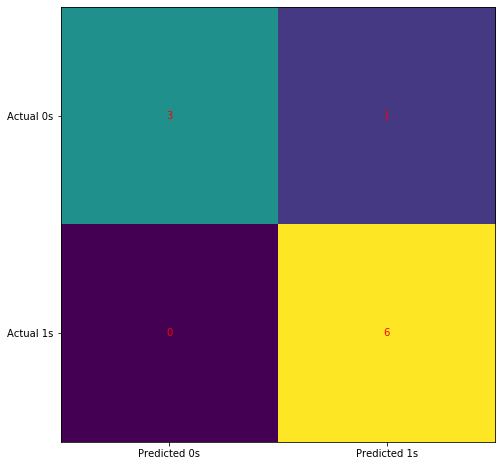

In [33]:
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

## Saving the model

In [23]:
import joblib
filename = 'XG Boost model.sav'
joblib.dump(model, filename)

['XG Boost model.sav']

In [51]:
pred_data = pd.read_csv(r'parkinson_test.csv', header=0)
pred_data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470


In [52]:
pred_data.shape

(104, 14)

In [53]:
pred_X = pred_data.iloc[:, :].values
pred_X

array([[1.19992e+02, 1.57302e+02, 7.49970e+01, ..., 3.13000e-02,
        2.97100e-02, 6.54500e-02],
       [1.22400e+02, 1.48650e+02, 1.13819e+02, ..., 4.51800e-02,
        4.36800e-02, 9.40300e-02],
       [1.16682e+02, 1.31111e+02, 1.11555e+02, ..., 3.85800e-02,
        3.59000e-02, 8.27000e-02],
       ...,
       [1.98383e+02, 2.15203e+02, 1.93104e+02, ..., 8.25000e-03,
        9.51000e-03, 1.91900e-02],
       [1.32103e+02, 1.95934e+02, 1.02007e+02, ..., 3.79000e-02,
        5.53400e-02, 1.01970e-01],
       [1.45608e+02, 2.26401e+02, 6.33960e+01, ..., 2.55300e-02,
        3.45600e-02, 7.18900e-02]])

In [54]:
pred_X = standard_X.transform(pred_X)
pred_X

array([[-0.97362395, -0.50106623, -1.02100362, ...,  2.47437817,
         1.06256436,  1.20861988],
       [-0.91990864, -0.58932319, -0.27253087, ...,  4.39509176,
         2.37730419,  2.4260814 ],
       [-1.04746019, -0.76823429, -0.31617989, ...,  3.48178415,
         1.64511551,  1.94344183],
       ...,
       [ 0.7750458 ,  0.08956788,  1.25605247, ..., -0.71527948,
        -0.83849108, -0.76198089],
       [-0.70346361, -0.10699053, -0.50026154, ...,  3.38768579,
         3.47464609,  2.76431249],
       [-0.40220728,  0.20379597, -1.2446663 , ...,  1.67592591,
         1.51900589,  1.48295341]])

In [55]:
pred_y = model.predict(pred_X)
res = pd.DataFrame(pred_y)
res.columns = ["status"]
res.to_csv("XGBoost - predictions - XG - new 4.csv")